## Data Exploration on Vaccinations per California County

In this notebook, I will quickly create a bar plot showing the percentage of vaccinated residents for each county in California.

In [48]:
import pandas as pd

In [4]:
vaccinations = pd.read_csv("vaccination_by_ca_county.csv")
vaccinations

,county,county_type,demographic_category,demographic_value,est_population,est_age_12plus_pop,est_age_5plus_pop,administered_date,partially_vaccinated,total_partially_vaccinated,...,cumulative_unvax_total_pop,cumulative_unvax_12plus_pop,cumulative_unvax_5plus_pop,suppress_data,booster_recip_count,cumulative_booster_recip_count,bivalent_booster_recip_count,cumulative_bivalent_booster_recip_count,booster_eligible_population,bivalent_booster_eligible_population
0,NaN,DERIVED FROM RECIP ZIP,HPI Quartile Census,1,NaN,NaN,NaN,2022-12-20,0.0,14581.0,...,NaN,NaN,NaN,False,6,32269,20,7506,60470,60470
1,NaN,DERIVED FROM RECIP ZIP,HPI Quartile Census,2,NaN,NaN,NaN,2022-12-20,0.0,5444.0,...,NaN,NaN,NaN,False,2,15123,12,4331,26013,26013
2,NaN,DERIVED FROM RECIP ZIP,HPI Quartile Census,3,NaN,NaN,NaN,2022-12-20,0.0,1721.0,...,NaN,NaN,NaN,False,0,6250,9,2007,9783,9783
3,NaN,DERIVED FROM RECIP ZIP,HPI Quartile Census,4,NaN,NaN,NaN,2022-12-20,0.0,403.0,...,NaN,NaN,NaN,False,1,1381,1,406,2153,2153
4,Alameda,MIXED,Age Group,12-17,120945.0,120945.0,120945.0,2022-12-20,3.0,5932.0,...,12237.0,12237.0,12237.0,False,181,61743,181,21113,102636,102636
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1356,Yuba,MIXED,Race/Ethnicity,White,40334.0,34748.0,38056.0,2022-12-20,3.0,1682.0,...,18874.0,13288.0,16596.0,False,9,10502,9,3443,19723,19723
1357,Yuba,DERIVED FROM RECIP ZIP,VEM Quartile,1,63873.0,50892.0,58461.0,2022-12-20,7.0,3493.0,...,26523.0,13542.0,21111.0,False,17,16139,17,4188,33733,33733
1358,Yuba,DERIVED FROM RECIP ZIP,VEM Quartile,2,7546.0,6547.0,7221.0,2022-12-20,0.0,321.0,...,3518.0,2519.0,3193.0,False,1,1989,1,677,3704,3704
1359,Yuba,DERIVED FROM RECIP ZIP,VEM Quartile,3,4007.0,3466.0,3805.0,2022-12-20,0.0,160.0,...,2091.0,1550.0,1889.0,False,2,995,2,360,1755,1755


In [13]:
print('Missing Values:')
print(vaccinations.isna().sum())

Missing Values:
county                                       4
county_type                                  0
demographic_category                         0
demographic_value                            0
est_population                             215
est_age_12plus_pop                         404
est_age_5plus_pop                          404
administered_date                            0
partially_vaccinated                        16
total_partially_vaccinated                  16
fully_vaccinated                            16
cumulative_fully_vaccinated                 16
at_least_one_dose                           16
cumulative_at_least_one_dose                16
cumulative_unvax_total_pop                 231
cumulative_unvax_12plus_pop                420
cumulative_unvax_5plus_pop                 420
suppress_data                                0
booster_recip_count                          0
cumulative_booster_recip_count               0
bivalent_booster_recip_count                

Disclaimer: For the real 10 week project, I would deal with missing values. However, since this assessment is supposed to be completed in an hour, I will not clean the data.

In [50]:
grouped = vaccinations[["county", "county_type", "est_population", "cumulative_fully_vaccinated"]].groupby("county").agg("mean")
grouped.head(5)

/var/folders/02/lp673bk96gl_pm2qdyc0pqdw0000gn/T/ipykernel_30805/2451087213.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  grouped = vaccinations[["county", "county_type", "est_population", "cumulative_fully_vaccinated"]].groupby("county").agg("mean")


,est_population,cumulative_fully_vaccinated
county,,
Alameda,317090.904762,244212.913043
Alpine,282.066667,142.750000
Amador,8212.111111,3887.739130
Butte,45289.800000,20497.086957
Calaveras,8847.100000,4177.652174


In [51]:
grouped["% vaccinated"] = grouped["cumulative_fully_vaccinated"] / grouped["est_population"] * 100
grouped.head(5)

,est_population,cumulative_fully_vaccinated,% vaccinated
county,,,
Alameda,317090.904762,244212.913043,77.016688
Alpine,282.066667,142.750000,50.608603
Amador,8212.111111,3887.739130,47.341531
Butte,45289.800000,20497.086957,45.257623
Calaveras,8847.100000,4177.652174,47.220583


I will pick 10 random counties and make a visualization based off of that.

In [44]:
random_10 = grouped.sample(frac=1).reset_index().head(10)
random_10

,county,est_population,cumulative_fully_vaccinated,rate vaccinated,% vaccinated
0,Amador,8212.111111,3887.739130,47.341531,47.341531
1,Butte,45289.800000,20497.086957,45.257623,45.257623
2,Sacramento,292886.333333,186530.869565,63.687120,63.687120
3,Contra Costa,218692.571429,168622.913043,77.105003,77.105003
4,Riverside,487634.500000,257744.260870,52.856035,52.856035
5,Kings,33230.166667,12244.173913,36.846562,36.846562
6,Kern,171124.952381,84475.826087,49.364996,49.364996
7,Shasta,35049.000000,14487.782609,41.335794,41.335794
8,Nevada,20627.473684,10901.913043,52.851421,52.851421
9,Yolo,41793.761905,27828.130435,66.584412,66.584412


<AxesSubplot: title={'center': 'Percent of Population of County Fully vaccinated'}, xlabel='county'>

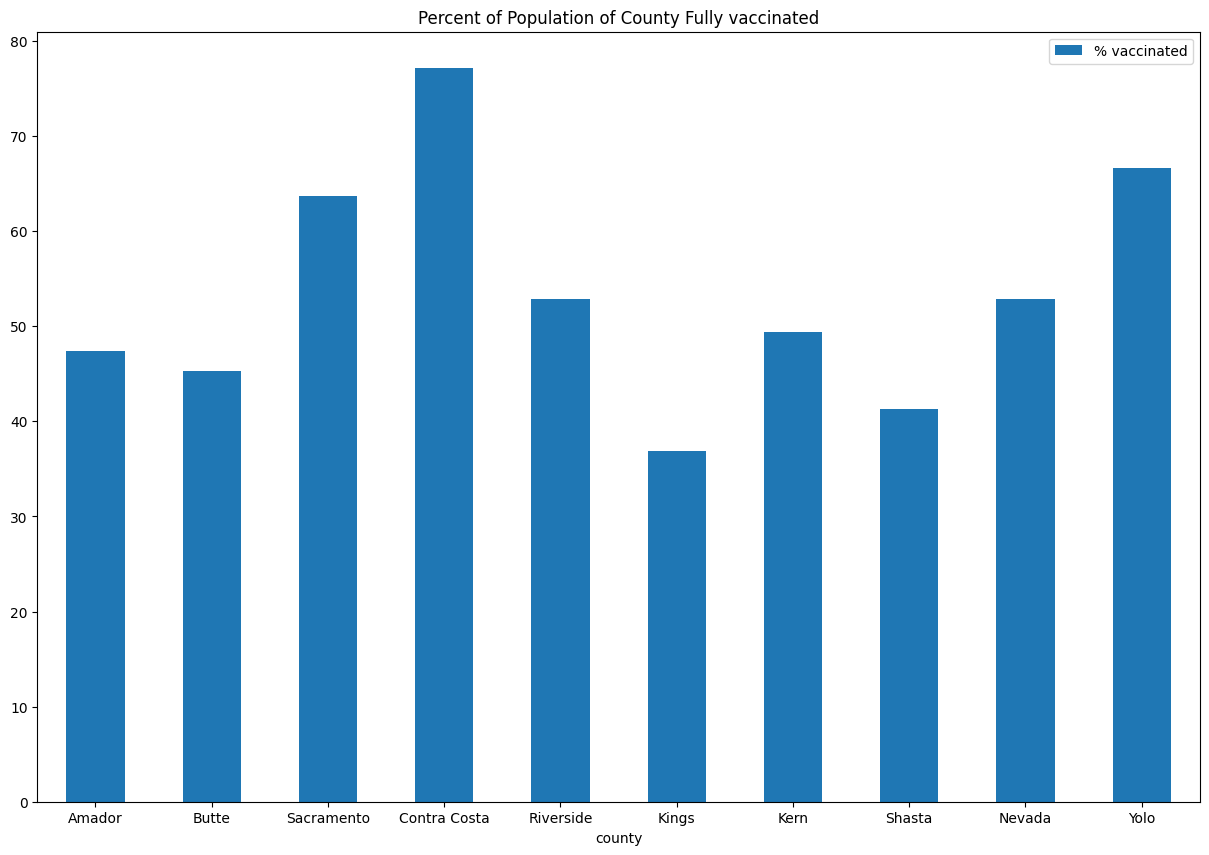

In [45]:
random_10.plot.bar(x="county", y="% vaccinated", rot=0, figsize=(15, 10), title = "Percent of Population of County Fully vaccinated")